In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.Neural_network import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# 输入一些自建数据，测试网络

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

## forward pass:compute scores

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


## forward pass: compute loss

In [4]:
loss,_ = net.loss(X, y, reg=0.1)
print(loss)

1.3037878913298202


## gradient check

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# compute the analytic_grad
loss, grads = net.loss(X, y, reg = 0.0)

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

for param_name in grads:
    # compute the numerical_grad
    f = lambda w: net.loss(X, y, reg = 0.0)[0]
    grad_numerical = eval_numerical_gradient(f, net.params[param_name])
    print('relative error in %s is %e' % (param_name, rel_error(grad_numerical, grads[param_name])))
    

KeyboardInterrupt: 

## Train the network

Final training loss: 0.01548562056793345


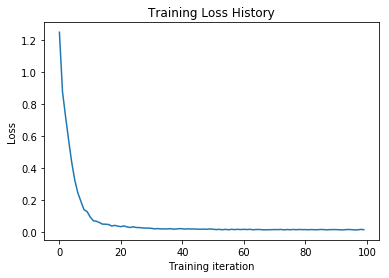

In [8]:
stats = net.train(X, y, X, y, learning_rate=1e-1, reg=1e-5, num_iters=100, verbose=False)
print('Final training loss:', stats['loss_history'][-1])

plt.plot(stats['loss_history'])
plt.title('Training Loss History')
plt.xlabel('Training iteration')
plt.ylabel('Loss')
plt.show()

# 正式训练网络

In [15]:
from cs231n.data_utils import load_CIFAR10

cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

num_training = 49000
num_validation = 1000
num_test = 1000

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


iteration 0 / 1000: loss 2.303008
iteration 100 / 1000: loss 2.029092
iteration 200 / 1000: loss 1.791751
iteration 300 / 1000: loss 1.619564
iteration 400 / 1000: loss 1.727672
iteration 500 / 1000: loss 1.619193
iteration 600 / 1000: loss 1.564868
iteration 700 / 1000: loss 1.693486
iteration 800 / 1000: loss 1.505836
iteration 900 / 1000: loss 1.604753
Final training loss: 1.4949434481259658


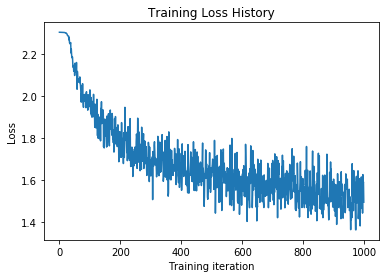

In [27]:
input_size = 32 * 32 *3
hidden_size = 50
num_classes = 10

net= TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val, learning_rate=1e-3, learning_rate_decay=0.95, reg=0.5, num_iters=1000, batch_size=200, verbose=True)
print('Final training loss:', stats['loss_history'][-1])

plt.plot(stats['loss_history'])
plt.title('Training Loss History')
plt.xlabel('Training iteration')
plt.ylabel('Loss')
plt.show()

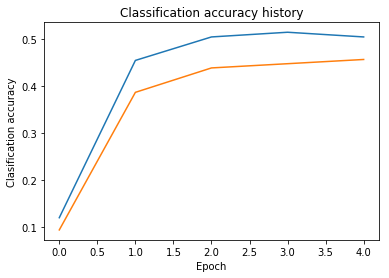

In [33]:
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [34]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.462


## 权重可视化

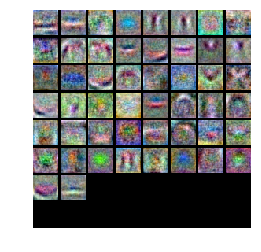

In [43]:
from cs231n.vis_utils import visualize_grid

def show_net_weights_W1(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights_W1(net)

## 寻找最佳的超参数

In [56]:
hidden_sizes = [75, 100, 125]
learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
regularization_strengths = [0.5, 0.75, 1, 1.25]

results = {}
best_val = -1
best_net = None

for hs in hidden_sizes:
    for rs in regularization_strengths:
        for lr in learning_rates:
            net_model = TwoLayerNet(input_size, hs, num_classes)
            stats = net_model.train(X_train, y_train, X_val, y_val, learning_rate=lr, learning_rate_decay=0.95, reg=rs, num_iters=1000, batch_size=200, verbose=False)
            training_accuracy = max(stats['train_acc_history'])
#             validation_accuracy = max(stats['val_acc_history'])
            validation_accuracy = (net_model.predict(X_val) == y_val).mean()
            if validation_accuracy > best_val:
                best_val = validation_accuracy
                best_net = net_model
            results[(hs, lr, rs)] = training_accuracy, validation_accuracy # {tuple : list}

for hs, lr, rs in sorted(results):
    training_accuracy, validation_accuracy = results[(hs, lr, rs)]
    print('when the hidden size is %d, learning rate is: %e, regularization strengths is : %e' % (hs, lr, rs))
    print('the training accuracy is: %f, the validation accuracy is : %f' % (training_accuracy, validation_accuracy))
    
print('the best validation accuracy is: %f' % best_val)

when the hidden size is 75, learning rate is: 7.000000e-04, regularization strengths is : 5.000000e-01
the training accuracy is: 0.570000, the validation accuracy is : 0.467000
when the hidden size is 75, learning rate is: 7.000000e-04, regularization strengths is : 7.500000e-01
the training accuracy is: 0.510000, the validation accuracy is : 0.449000
when the hidden size is 75, learning rate is: 7.000000e-04, regularization strengths is : 1.000000e+00
the training accuracy is: 0.475000, the validation accuracy is : 0.461000
when the hidden size is 75, learning rate is: 7.000000e-04, regularization strengths is : 1.250000e+00
the training accuracy is: 0.550000, the validation accuracy is : 0.467000
when the hidden size is 75, learning rate is: 8.000000e-04, regularization strengths is : 5.000000e-01
the training accuracy is: 0.585000, the validation accuracy is : 0.455000
when the hidden size is 75, learning rate is: 8.000000e-04, regularization strengths is : 7.500000e-01
the training

Test accuracy:  0.465


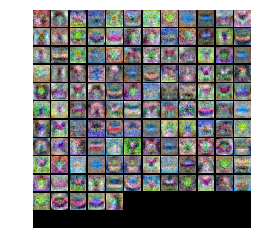

In [53]:
_hs = 100
_lr = 8.000000e-04
_rs = 5.000000e-01

test_net_model = TwoLayerNet(input_size, hs, num_classes)     
stats = test_net_model.train(X_train, y_train, X_val, y_val, learning_rate=_lr, learning_rate_decay=0.95, reg=_rs, num_iters=1000, batch_size=200, verbose=False)

test_acc = (test_net_model.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

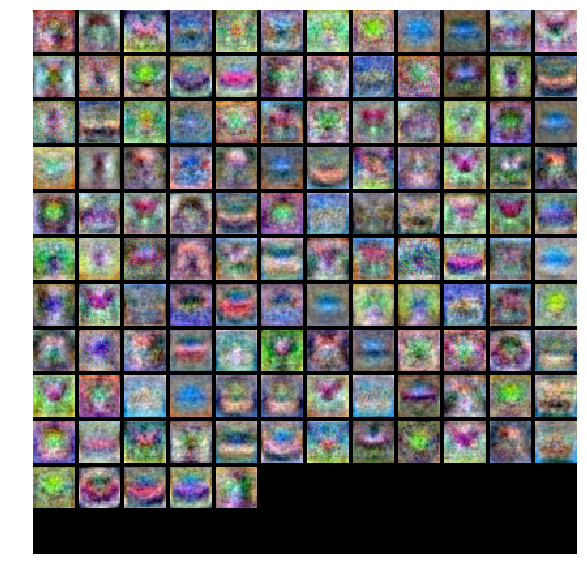

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from cs231n.vis_utils import visualize_grid

def show_net_weights_W1(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights_W1(test_net_model)

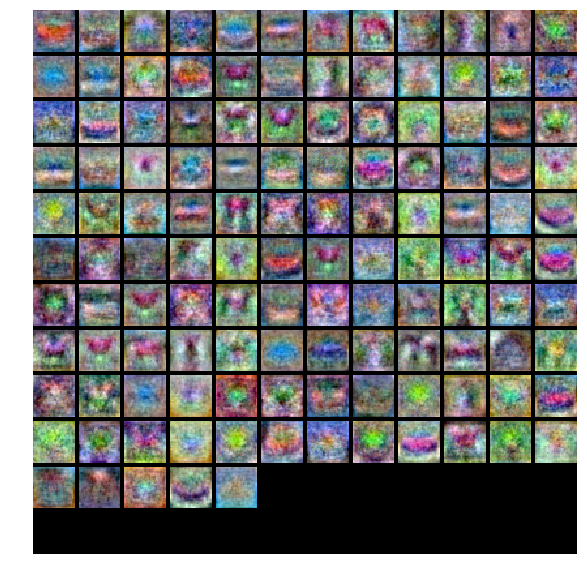

Test accuracy:  0.514


In [60]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

show_net_weights_W1(best_net)
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)